# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
!pip install opencv-python

    100% |████████████████████████████████| 24.9MB 27kB/s  eta 0:00:01   21% |██████▉                         | 5.3MB 29.5MB/s eta 0:00:01


In [2]:
%%time
!mkdir images_data
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
!unzip traffic-signs-data.zip -d images_data/

--2018-02-22 17:30:55--  https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 54.192.37.60, 54.192.37.117, 54.192.37.190, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|54.192.37.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M  59.8MB/s    in 2.0s    

2018-02-22 17:30:57 (59.8 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]

Archive:  traffic-signs-data.zip
  inflating: images_data/test.p      
  inflating: images_data/train.p     
  inflating: images_data/valid.p     
CPU times: user 96 ms, sys: 44 ms, total: 140 ms
Wall time: 4.6 s


In [3]:
%%time
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt

import imageio
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

import cv2
from sklearn.utils import shuffle
import sys, os, glob, csv

from tensorflow.contrib.layers import flatten
import tensorflow as tf

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


CPU times: user 5.31 s, sys: 1.02 s, total: 6.33 s
Wall time: 1min 41s


In [4]:
%%time
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "images_data/train.p"
validation_file= "images_data/valid.p"
testing_file = "images_data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

CPU times: user 36 ms, sys: 88 ms, total: 124 ms
Wall time: 125 ms


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
%%time
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 4.47 ms


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
CPU times: user 188 ms, sys: 28 ms, total: 216 ms
Wall time: 305 ms


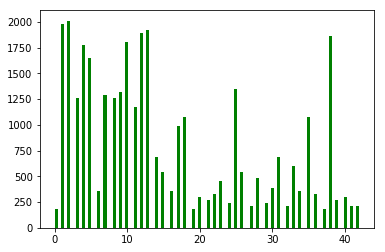

In [6]:
%%time
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

bincount_img= np.bincount(y_train)
print(bincount_img)
# plt.lineplot(range(43),bincount_img, "b*", linewidth=1.0, label="images frequecy")

plt.hist(y_train,100, facecolor='g')

In [7]:
max_samples = max(bincount_img)
print("Max no. samples:",max_samples)
avg_samples = int(sum(bincount_img)/len(bincount_img))
print("Avg no. samples:", avg_samples)

Max no. samples: 2010
Avg no. samples: 809


Image label 41


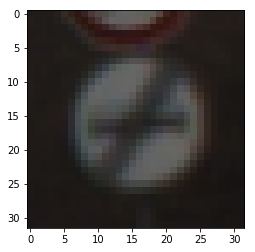

In [8]:
image_idx =10
print ("Image label", y_train[image_idx])
plt.imshow(X_train[image_idx])

In [9]:
%%time
import imageio
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
###generating GIF for each signal call
for i in range(n_classes):
#     i=1
    image_idx=np.nonzero((y_train==i))
#     print(len(image_idx[0]))
    output_file = "gif_img/" + "Traffics_signs_{:02d}.gif".format(i)
    with imageio.get_writer(output_file, mode='I') as writer:
        counter=1
        for idx in image_idx[0]:
            img = X_train[idx]
            writer.append_data(img)

CPU times: user 2min 50s, sys: 236 ms, total: 2min 50s
Wall time: 2min 50s


In [10]:
import sys, os, csv
# from IPython.display import HTML
# from IPython.core.display import Image, display
csv_data = []
with open('signnames.csv', 'r') as csvfile:
    csv_file_data = csv.reader(csvfile, delimiter=',', quotechar='|')
    csv_data = [row for row in csv_file_data]

In [25]:
gif_dir = "gif_img"
from IPython.display import display, HTML
files = os.listdir(gif_dir)
files.sort()
def make_html(files, sign_name):
     return '<img src="{}" style="display:inline;margin:20px" height="80" width="80" title="{}"/>'.\
               format(gif_dir + "/" + files, sign_name)
disp_imgs = ''.join(make_html(x, sign_name) for x, sign_name in zip (files, csv_data[1:]))

# disp_imgs = ''.join('<img src="{}" style="display:inline;margin:20px" height="80" width="80" title="{}"/>'.\
#                format(gif_dir + "/" + x, sign_name) for x, sign_name in zip (files, csv_data[1:]))
# print(disp3)

print("GIF of each traffic signal class")
display(HTML(disp_imgs))    
  

GIF of each traffic signal class


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

    
def normailization_1(X_data):    
    X_data = X_data/128 - 1
    return X_data

def normailization_2(X_data):    
    X_data = X_data/255
    return X_data

def gray_scale_np(X_data):
    col_weights= np.array([0.299, 0.587, 0.114])
#     print (X_data.shape)
#     X_data_f = np.zeros(X_data.shape[:-1]+(1,))
    X_data_f=np.dot(X_data[...,:3], col_weights)
    X_data_f = X_data_f.reshape(X_data_f.shape +(1,))
#     print (X_data_f.shape)
    return X_data_f


def preprocess_data(X_data):
    X_data = normailization_2(X_data)
    X_data = gray_scale_np(X_data)
    
    return X_data

In [13]:
%%time
#run preprocessing data
X_train = preprocess_data(X_train)
X_validation = preprocess_data(X_validation)
X_test = preprocess_data(X_test)

CPU times: user 2.87 s, sys: 272 ms, total: 3.14 s
Wall time: 3.14 s


Image label 41


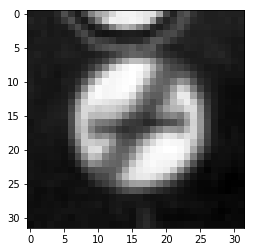

In [14]:
image_idx =10
print ("Image label", y_train[image_idx])
plt.imshow(X_train[image_idx].reshape(32,32), cmap = 'gray')

In [15]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

def LeNet(x, keep_prob1):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    with tf.name_scope('Conv_Layer1'):    
        # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name ='conv1_W')
        conv1_b = tf.Variable(tf.zeros(6), name ='conv1_b')
        conv1   = tf.nn.bias_add(tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID'), conv1_b)

        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1, name="relu_conv1")

        # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    with tf.name_scope('Conv_Layer2'):
        # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name ='conv2_W')
        conv2_b = tf.Variable(tf.zeros(16), name ='conv2_b')
        conv2   = tf.nn.bias_add(tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID'), conv2_b)

        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2, name="relu_conv2")

        # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    with tf.name_scope('FC_Layer1'):
        # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
        fc0   = flatten(conv2)
    
        # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name ="fc1_W")
        fc1_b = tf.Variable(tf.zeros(120), name ="fc1_b")
        fc1   = tf.add(tf.matmul(fc0, fc1_W), fc1_b)

        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1, name="relu_fc1")
        fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob1)
    
    with tf.name_scope('FC_Layer2'):
        # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name ="fc2_W")
        fc2_b  = tf.Variable(tf.zeros(84), name ="fc2_b")
        fc2    = tf.add(tf.matmul(fc1, fc2_W), fc2_b)

        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2, name="relu_fc2")
    #     fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob1)
    
    with tf.name_scope('FC_Layer3'):
        # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma), name ="fc3_W")
        fc3_b  = tf.Variable(tf.zeros(n_classes), name ="fc3_b")

        logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
    return logits

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob1 = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [18]:
rate = 0.0005
# keep_prob1= 0.4
with tf.name_scope('Model'):
    logits = LeNet(x, keep_prob1)
with tf.name_scope('Loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
with tf.name_scope('SGD'):
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", loss_operation)

<tf.Tensor 'loss:0' shape=() dtype=string>

In [19]:
%%time
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Create a summary to monitor cost tensor
tf.summary.scalar("accuracy", accuracy_operation)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy= sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob1: 1.0})
#         loss, accuracy, summary = sess.run([loss_operation, accuracy_operation, merged_summary_op], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
#         summary_writer.add_summary(summary, BATCH_SIZE + offset)
#     return total_loss/num_examples, total_accuracy/num_examples, summary
    return total_loss/num_examples, total_accuracy/num_examples


CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 8.55 ms


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
EPOCHS = 100
BATCH_SIZE = 128
import os
WORK_DIR = os.path.curdir
MODEL_DIR = WORK_DIR + "/Model_ouput_lenet"
logs_path = WORK_DIR + "/logs"
# if not(os.path.isdir(MODEL_DIR)):
#     os.makedirs(MODEL_DIR)
saver = tf.train.Saver()        

In [21]:
%%time
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

training_accuracy_history = []
validation_accuracy_history = []
training_loss_history = []
validation_loss_history = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
#     saver.restore(sess, "./Model_ouput_lenet")
    num_examples = len(X_train)

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss, _ = sess.run([loss_operation,training_operation], feed_dict={x: batch_x, y: batch_y , keep_prob1: 0.4})
#             loss, _, summary = sess.run([loss_operation,training_operation, merged_summary_op], feed_dict={x: batch_x, y: batch_y})
            # Write logs at every iteration
#             summary_writer.add_summary(summary, i * BATCH_SIZE + offset)
            
        
        training_loss, training_accuracy = evaluate(X_train, y_train)
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
#         validation_loss, validation_accuracy, summary = evaluate(X_validation, y_validation)
#         summary_writer.add_summary(summary, i * BATCH_SIZE)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation loss = {:.3f}".format(validation_loss))
        print()
        training_loss_history.append(training_loss)
        training_accuracy_history.append(training_accuracy)
        validation_loss_history.append(validation_loss)
        validation_accuracy_history.append(validation_accuracy)
    
        
    save_path = saver.save(sess, MODEL_DIR)
    print("Model saved in file: %s" % save_path)

Training...

EPOCH 1 ...
Training Accuracy = 0.510
Validation Accuracy = 0.454
Validation loss = 2.036

EPOCH 2 ...
Training Accuracy = 0.744
Validation Accuracy = 0.676
Validation loss = 1.111

EPOCH 3 ...
Training Accuracy = 0.834
Validation Accuracy = 0.782
Validation loss = 0.800

EPOCH 4 ...
Training Accuracy = 0.868
Validation Accuracy = 0.816
Validation loss = 0.628

EPOCH 5 ...
Training Accuracy = 0.897
Validation Accuracy = 0.854
Validation loss = 0.533

EPOCH 6 ...
Training Accuracy = 0.919
Validation Accuracy = 0.873
Validation loss = 0.463

EPOCH 7 ...
Training Accuracy = 0.926
Validation Accuracy = 0.875
Validation loss = 0.434

EPOCH 8 ...
Training Accuracy = 0.940
Validation Accuracy = 0.888
Validation loss = 0.390

EPOCH 9 ...
Training Accuracy = 0.944
Validation Accuracy = 0.896
Validation loss = 0.368

EPOCH 10 ...
Training Accuracy = 0.953
Validation Accuracy = 0.908
Validation loss = 0.346

EPOCH 11 ...
Training Accuracy = 0.960
Validation Accuracy = 0.921
Validatio

EPOCH 91 ...
Training Accuracy = 0.999
Validation Accuracy = 0.974
Validation loss = 0.126

EPOCH 92 ...
Training Accuracy = 0.999
Validation Accuracy = 0.972
Validation loss = 0.132

EPOCH 93 ...
Training Accuracy = 0.999
Validation Accuracy = 0.971
Validation loss = 0.151

EPOCH 94 ...
Training Accuracy = 0.998
Validation Accuracy = 0.970
Validation loss = 0.180

EPOCH 95 ...
Training Accuracy = 0.999
Validation Accuracy = 0.971
Validation loss = 0.139

EPOCH 96 ...
Training Accuracy = 0.999
Validation Accuracy = 0.972
Validation loss = 0.144

EPOCH 97 ...
Training Accuracy = 0.999
Validation Accuracy = 0.970
Validation loss = 0.176

EPOCH 98 ...
Training Accuracy = 0.999
Validation Accuracy = 0.969
Validation loss = 0.162

EPOCH 99 ...
Training Accuracy = 0.999
Validation Accuracy = 0.971
Validation loss = 0.153

EPOCH 100 ...
Training Accuracy = 0.999
Validation Accuracy = 0.966
Validation loss = 0.165

Model saved in file: ./Model_ouput_lenet
CPU times: user 5min 44s, sys: 57.2 s,

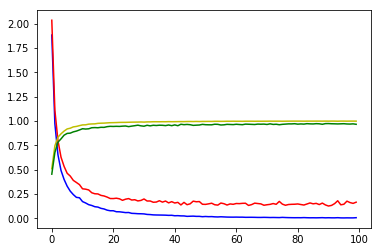

In [22]:
plt.plot(training_loss_history, "b-")
plt.plot(validation_loss_history, "r-")
plt.plot(training_accuracy_history, "y-")
plt.plot(validation_accuracy_history, "g-")



In [23]:
%%time
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, "./Model_ouput_lenet")
    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))

Test Accuracy = 0.938
Test Loss = 0.402
CPU times: user 432 ms, sys: 292 ms, total: 724 ms
Wall time: 519 ms


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

<class 'numpy.ndarray'>
(5, 32, 32, 3)
CPU times: user 308 ms, sys: 0 ns, total: 308 ms
Wall time: 302 ms


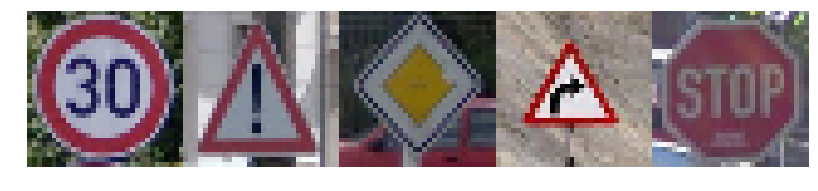

In [26]:
%%time
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os, glob, cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Visualizations will be shown in the notebook.
%matplotlib inline

WORK_DIR = os.path.curdir
web_files_path = WORK_DIR + "/web_images"
files = glob.glob(web_files_path +'/*.jpg')
files.sort()
fig, axs = plt.subplots(1,len(files), figsize=(14, 7))
fig.subplots_adjust(hspace = 1.2, wspace=.001)
axs = axs.ravel()

# x_web_images = np.empty((0,32,32,3), int)
# y_web_images = np.empty((0,), int)
x_web_images_list = []
y_web_images = []

for i, img in enumerate(files):
    image =mpimg.imread(img)
    x_web_images_resized = cv2.resize(image, (32,32))
    axs[i].axis('off')
    axs[i].imshow(x_web_images_resized)
#     x_web_images = np.concatenate((x_web_images, [x_web_images_resized]), axis=0, uint32)
    x_web_images_list.append(x_web_images_resized)
#     y_web_images.append(image_filename_truncated)

x_web_images= np.asarray(x_web_images_list)
# print(type(x_web_images))
# print(x_web_images.shape)
x_web_images_normalized = preprocess_data(x_web_images)
# x_web_images_normalized = x_web_images

In [27]:
y_web_images = np.array([1, 18, 12, 20, 14])    
    

### Predict the Sign Type for Each Image

In [28]:
%%time

### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

prediction = tf.nn.softmax(logits)



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.07 ms


### Analyze Performance

In [29]:
%%time
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    web_test_loss, web_test_accuracy = evaluate(x_web_images_normalized, y_web_images)
    print("Test Set Accuracy = {:.3f}".format(web_test_accuracy))



Test Set Accuracy = 1.000
CPU times: user 88 ms, sys: 116 ms, total: 204 ms
Wall time: 91.7 ms


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) used here. 



In [30]:
%%time
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# prediction = tf.nn.softmax(logits)
top_k = tf.nn.top_k(prediction, k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    OUT_top_k = sess.run(top_k, feed_dict={x: x_web_images_normalized, keep_prob1: 1.0})

    
print(OUT_top_k)   

TopKV2(values=array([[  9.96134520e-01,   3.86524573e-03,   2.38697481e-07,
          3.48103546e-09,   5.42475266e-11],
       [  1.00000000e+00,   7.70488447e-12,   2.34172359e-15,
          3.87953848e-16,   3.41412088e-16],
       [  1.00000000e+00,   1.66342825e-11,   2.62573221e-13,
          7.54586670e-15,   9.31518528e-18],
       [  9.98889029e-01,   1.07852533e-03,   3.21608568e-05,
          2.91648178e-07,   4.04680600e-09],
       [  9.99496222e-01,   1.60478463e-04,   1.48772582e-04,
          7.39646566e-05,   7.01190875e-05]], dtype=float32), indices=array([[ 1,  2,  3,  5,  6],
       [18, 27,  4, 25, 26],
       [12, 40,  9, 13, 11],
       [20, 16, 23, 19, 10],
       [14,  2,  3, 13,  1]], dtype=int32))
CPU times: user 80 ms, sys: 124 ms, total: 204 ms
Wall time: 95.9 ms


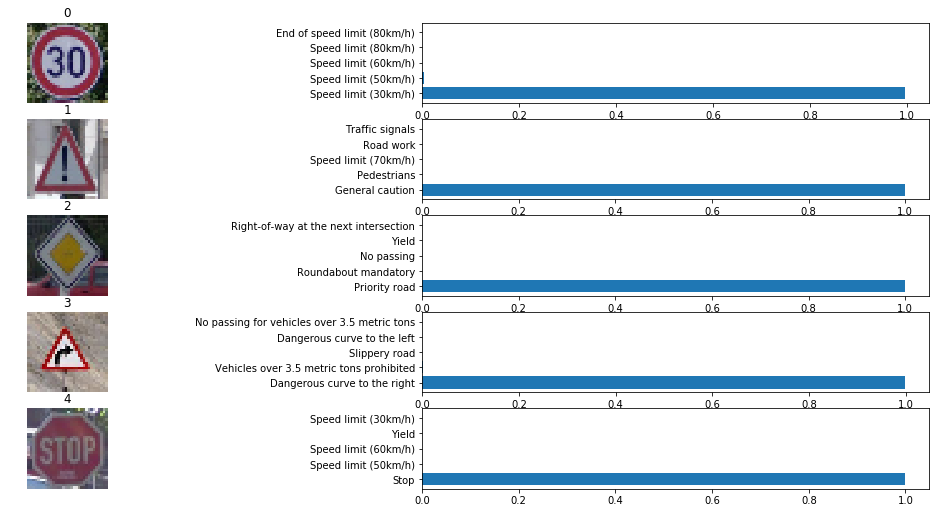

In [31]:
# Display the probabilites
np_csv_data= np.asarray(csv_data[1:])
no_imgs= x_web_images.shape[0]

plt.figure(figsize=(20, 21))
for i in range(no_imgs):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(x_web_images[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(0,5), OUT_top_k.values[i, :])
    x_axis_values=[np_csv_data[j][1] for j in OUT_top_k.indices[i]]
    plt.yticks(np.arange(0,5), x_axis_values)
plt.show() 

 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.